In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('dataset.csv')
df

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,147354028484268644,10.127.0.165,93.184.221.240,80,tcp,-,680029,541,6,212,10262,10803,218,malware,smokeloader
1,7805179489241942373,10.127.0.165,8.8.8.8,53,udp,dns,42386,37139,266,281,20026,57165,547,Normal,-
2,-5256877561817751082,10.127.0.165,109.206.243.140,80,tcp,http,93282,172869,181,174,14782,187651,355,malware,smokeloader
3,-2398875457033335518,10.127.0.165,8.241.130.254,80,tcp,-,-1,0,0,0,0,0,0,malware,smokeloader
4,7893355198668207853,10.127.0.173,8.8.8.8,53,udp,dns,4055,16878,119,119,8476,25354,238,Normal,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,6211981979787643413,10.127.0.103,31.41.244.200,80,tcp,http,109974,407,5,6,523,930,11,malware,amadey
3359,5468578985132273066,10.127.0.80,193.56.146.220,4174,tcp,-,27319,22617,377,916,1210731,1233348,1293,malware,amadey
3360,5229754584007764678,10.127.0.80,31.41.244.200,80,tcp,http,65124,367,4,5,477,844,9,malware,amadey
3361,5026454844821735744,10.127.0.159,193.56.146.11,4173,tcp,-,75193,0,0,25,1300,1300,25,malware,amadey


In [104]:
cols = ['Flow id', 'Dst port', 'Protocol']
df = df[cols]
df

,Flow id,Dst port,Protocol
0,147354028484268644,80,tcp
1,7805179489241942373,53,udp
2,-5256877561817751082,80,tcp
3,-2398875457033335518,80,tcp
4,7893355198668207853,53,udp
...,...,...,...
3358,6211981979787643413,80,tcp
3359,5468578985132273066,4174,tcp
3360,5229754584007764678,80,tcp
3361,5026454844821735744,4173,tcp


In [105]:
data = df.groupby(['Dst port']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data = data[data['Flow id'] >= 20]
data = data.sort_values('Flow id', ascending=False)
data

,Dst port,Flow id
3,80,1414
13,443,945
33,8080,220
2,53,151
14,445,109
4,139,109
28,4174,82
44,40500,59
1,25,43
32,7080,38


<AxesSubplot: xlabel='Dst port', ylabel='Flow id'>

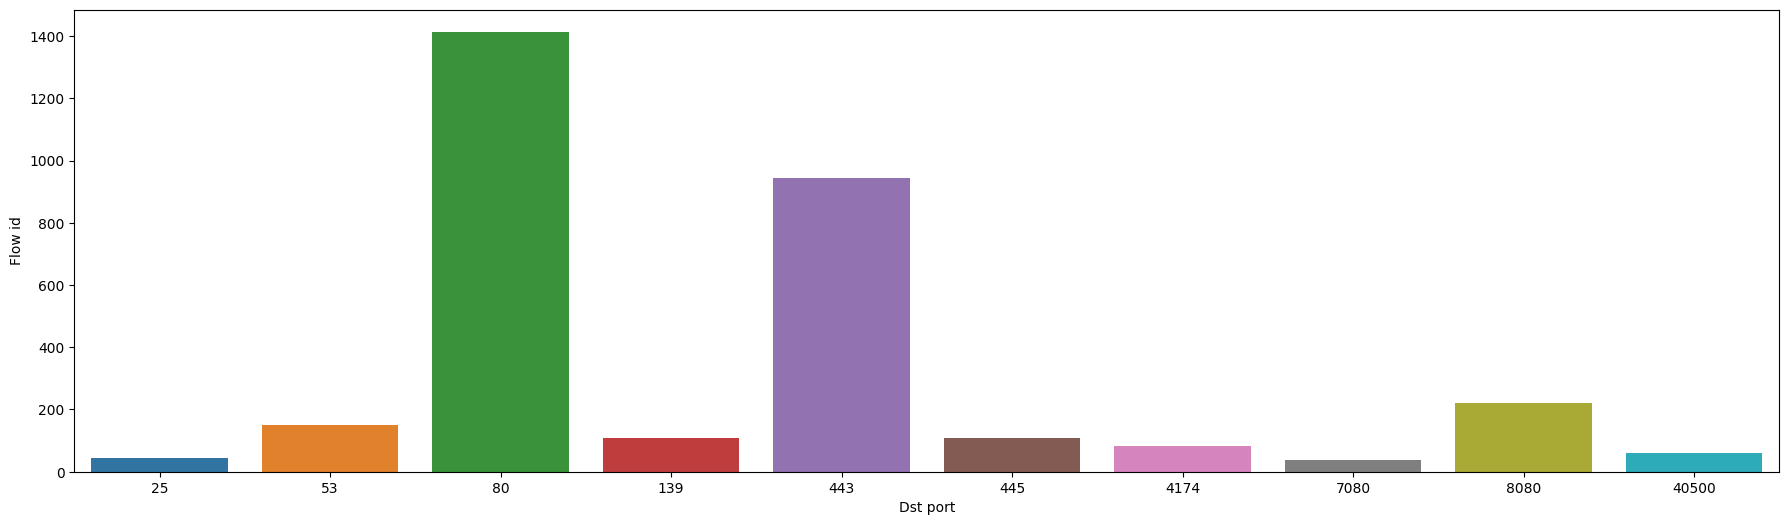

In [122]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(22, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data, x='Dst port', y='Flow id', ax=ax)

In [107]:
df2 = pd.read_csv('dataset.csv')
df2

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,147354028484268644,10.127.0.165,93.184.221.240,80,tcp,-,680029,541,6,212,10262,10803,218,malware,smokeloader
1,7805179489241942373,10.127.0.165,8.8.8.8,53,udp,dns,42386,37139,266,281,20026,57165,547,Normal,-
2,-5256877561817751082,10.127.0.165,109.206.243.140,80,tcp,http,93282,172869,181,174,14782,187651,355,malware,smokeloader
3,-2398875457033335518,10.127.0.165,8.241.130.254,80,tcp,-,-1,0,0,0,0,0,0,malware,smokeloader
4,7893355198668207853,10.127.0.173,8.8.8.8,53,udp,dns,4055,16878,119,119,8476,25354,238,Normal,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,6211981979787643413,10.127.0.103,31.41.244.200,80,tcp,http,109974,407,5,6,523,930,11,malware,amadey
3359,5468578985132273066,10.127.0.80,193.56.146.220,4174,tcp,-,27319,22617,377,916,1210731,1233348,1293,malware,amadey
3360,5229754584007764678,10.127.0.80,31.41.244.200,80,tcp,http,65124,367,4,5,477,844,9,malware,amadey
3361,5026454844821735744,10.127.0.159,193.56.146.11,4173,tcp,-,75193,0,0,25,1300,1300,25,malware,amadey


In [108]:
data2 = df2.groupby(['Application protocol']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data2 = data2[data2['Application protocol'] != "-"]
data2

,Application protocol,Flow id
2,http,966
4,tls,380
1,dns,149
3,https,11


<AxesSubplot: xlabel='Application protocol', ylabel='Flow id'>

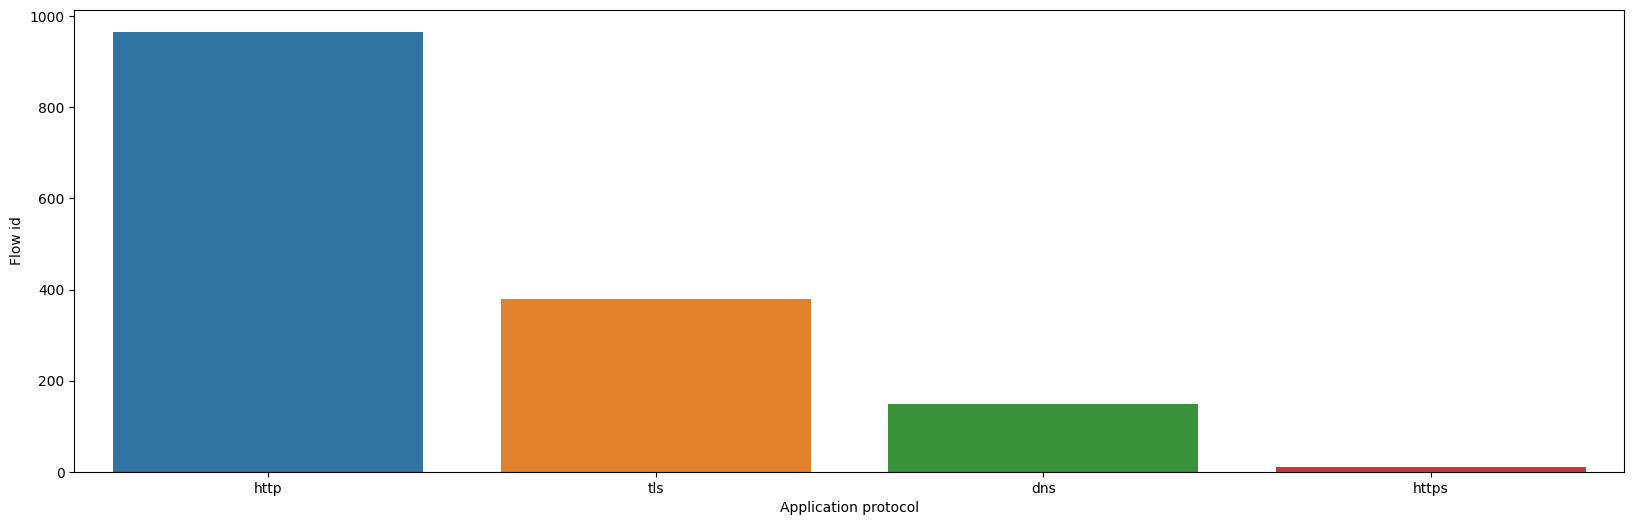

In [109]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data2, x='Application protocol', y='Flow id', ax=ax)

In [110]:
df = pd.read_csv('dataset.csv')
df

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,147354028484268644,10.127.0.165,93.184.221.240,80,tcp,-,680029,541,6,212,10262,10803,218,malware,smokeloader
1,7805179489241942373,10.127.0.165,8.8.8.8,53,udp,dns,42386,37139,266,281,20026,57165,547,Normal,-
2,-5256877561817751082,10.127.0.165,109.206.243.140,80,tcp,http,93282,172869,181,174,14782,187651,355,malware,smokeloader
3,-2398875457033335518,10.127.0.165,8.241.130.254,80,tcp,-,-1,0,0,0,0,0,0,malware,smokeloader
4,7893355198668207853,10.127.0.173,8.8.8.8,53,udp,dns,4055,16878,119,119,8476,25354,238,Normal,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,6211981979787643413,10.127.0.103,31.41.244.200,80,tcp,http,109974,407,5,6,523,930,11,malware,amadey
3359,5468578985132273066,10.127.0.80,193.56.146.220,4174,tcp,-,27319,22617,377,916,1210731,1233348,1293,malware,amadey
3360,5229754584007764678,10.127.0.80,31.41.244.200,80,tcp,http,65124,367,4,5,477,844,9,malware,amadey
3361,5026454844821735744,10.127.0.159,193.56.146.11,4173,tcp,-,75193,0,0,25,1300,1300,25,malware,amadey


In [111]:
cols = ['Flow id', 'family']
df = df[cols]
df

,Flow id,family
0,147354028484268644,smokeloader
1,7805179489241942373,-
2,-5256877561817751082,smokeloader
3,-2398875457033335518,smokeloader
4,7893355198668207853,-
...,...,...
3358,6211981979787643413,amadey
3359,5468578985132273066,amadey
3360,5229754584007764678,amadey
3361,5026454844821735744,amadey


In [112]:
data3 = df.groupby(['family']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data3 = data3[data3['family'] != "-"]
data3

,family,Flow id
4,coinminer,498
8,heodo,416
3,avaddon,307
6,formbook,293
12,smokeloader,293
1,agenttesla,285
13,snakekeylogger,194
11,redlinestealer,175
7,gcleaner,144
10,quakbot,141


<AxesSubplot: xlabel='family', ylabel='Flow id'>

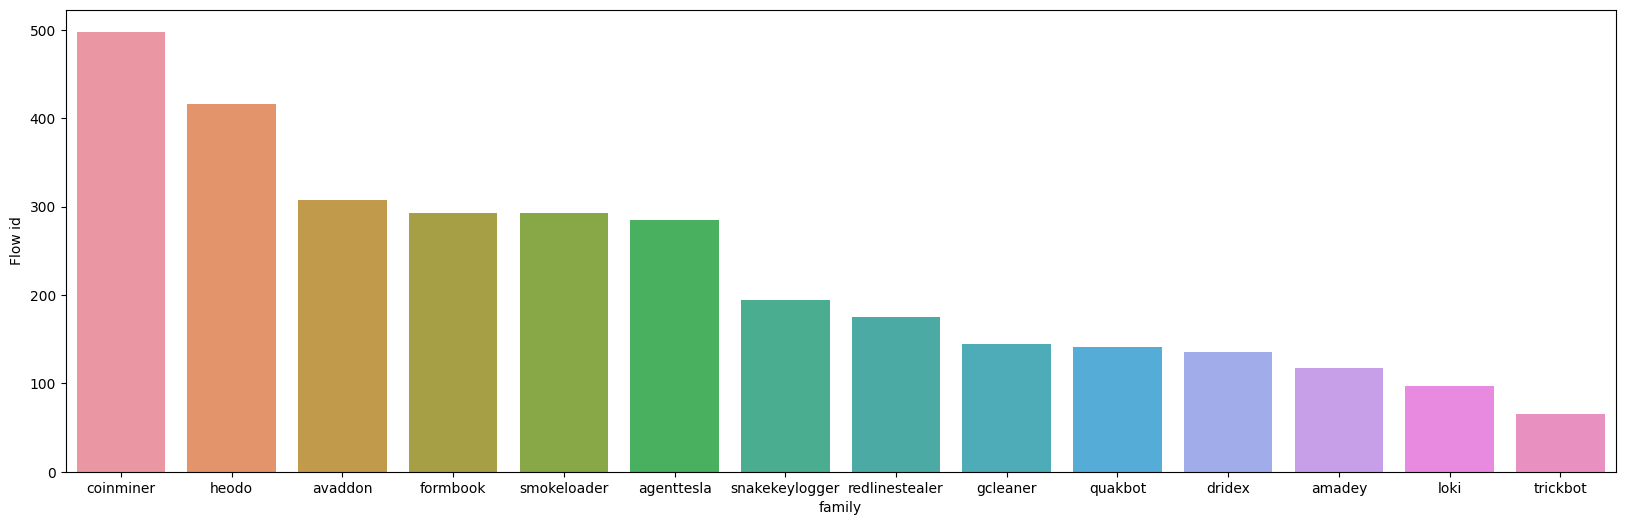

In [113]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data3, x='family', y='Flow id', ax=ax)

In [114]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('dataset.csv')
cols = ['Flow id', 'Protocol']
df = df[cols]
df


,Flow id,Protocol
0,147354028484268644,tcp
1,7805179489241942373,udp
2,-5256877561817751082,tcp
3,-2398875457033335518,tcp
4,7893355198668207853,udp
...,...,...
3358,6211981979787643413,tcp
3359,5468578985132273066,tcp
3360,5229754584007764678,tcp
3361,5026454844821735744,tcp


In [115]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Protocol']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)
# Drom protocol column
final_df.drop('Protocol', axis=1, inplace=True)
# Rename columns
final_df.rename(columns={0:'TCP', 1:'UDP'}, inplace=True)
final_df

,Flow id,TCP,UDP
0,147354028484268644,1.0,0.0
1,7805179489241942373,0.0,1.0
2,-5256877561817751082,1.0,0.0
3,-2398875457033335518,1.0,0.0
4,7893355198668207853,0.0,1.0
...,...,...,...
3358,6211981979787643413,1.0,0.0
3359,5468578985132273066,1.0,0.0
3360,5229754584007764678,1.0,0.0
3361,5026454844821735744,1.0,0.0


In [116]:
df = pd.read_csv('dataset.csv')
cols = ['Flow id', 'Application protocol']
df = df[cols]
df


,Flow id,Application protocol
0,147354028484268644,-
1,7805179489241942373,dns
2,-5256877561817751082,http
3,-2398875457033335518,-
4,7893355198668207853,dns
...,...,...
3358,6211981979787643413,http
3359,5468578985132273066,-
3360,5229754584007764678,http
3361,5026454844821735744,-


In [117]:
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Application protocol']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)
final_df

,Flow id,Application protocol,0,1,2,3,4
0,147354028484268644,-,1.0,0.0,0.0,0.0,0.0
1,7805179489241942373,dns,0.0,1.0,0.0,0.0,0.0
2,-5256877561817751082,http,0.0,0.0,1.0,0.0,0.0
3,-2398875457033335518,-,1.0,0.0,0.0,0.0,0.0
4,7893355198668207853,dns,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3358,6211981979787643413,http,0.0,0.0,1.0,0.0,0.0
3359,5468578985132273066,-,1.0,0.0,0.0,0.0,0.0
3360,5229754584007764678,http,0.0,0.0,1.0,0.0,0.0
3361,5026454844821735744,-,1.0,0.0,0.0,0.0,0.0


In [118]:
df = pd.read_csv('dataset.csv')
df2 = pd.read_csv('dataset2.csv')
df2

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,-1951701775171888650,10.0.2.15,20.190.160.17,443,TCP,tls,841,33848,50,38,13152,47000,88,Normal,-
1,-3920467876356272597,95.101.23.49,10.0.2.15,41062,TCP,-,82,216,4,4,290,506,8,Normal,-
2,-1982794344561258246,2.17.147.42,10.0.2.15,39544,TCP,-,6,108,2,6,410,518,8,Normal,-
3,8342336780989856366,10.0.2.15,209.197.3.8,80,TCP,http,358,1338,10,12,1826,3164,22,Normal,-
4,-2259149374586288762,10.0.2.15,104.46.162.224,443,TCP,tls,4862,14408,48,44,29422,43830,92,Normal,-
5,-3783203989607206343,10.0.2.15,104.208.16.94,443,TCP,tls,15154,13262,40,40,13714,26976,80,Normal,-
6,8950123661417014271,10.0.2.15,95.101.23.57,443,TCP,tls,374,25294,30,26,2642,27936,56,Normal,-
7,2718228605558563698,10.0.2.15,51.104.136.2,443,TCP,tls,2538804,10188,32,28,4008,14196,60,Normal,-
8,3917083121357023517,13.107.42.254,10.0.2.15,49058,TCP,-,0,0,0,2,120,120,2,Normal,-
9,-7713152363574955080,10.0.2.15,192.168.1.15,7680,TCP,-,29921,0,0,42,3108,3108,42,Normal,-


In [119]:
df = df.drop('Flow id', axis=1)
df2 = df2.drop('Flow id', axis=1)
df2

,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,10.0.2.15,20.190.160.17,443,TCP,tls,841,33848,50,38,13152,47000,88,Normal,-
1,95.101.23.49,10.0.2.15,41062,TCP,-,82,216,4,4,290,506,8,Normal,-
2,2.17.147.42,10.0.2.15,39544,TCP,-,6,108,2,6,410,518,8,Normal,-
3,10.0.2.15,209.197.3.8,80,TCP,http,358,1338,10,12,1826,3164,22,Normal,-
4,10.0.2.15,104.46.162.224,443,TCP,tls,4862,14408,48,44,29422,43830,92,Normal,-
5,10.0.2.15,104.208.16.94,443,TCP,tls,15154,13262,40,40,13714,26976,80,Normal,-
6,10.0.2.15,95.101.23.57,443,TCP,tls,374,25294,30,26,2642,27936,56,Normal,-
7,10.0.2.15,51.104.136.2,443,TCP,tls,2538804,10188,32,28,4008,14196,60,Normal,-
8,13.107.42.254,10.0.2.15,49058,TCP,-,0,0,0,2,120,120,2,Normal,-
9,10.0.2.15,192.168.1.15,7680,TCP,-,29921,0,0,42,3108,3108,42,Normal,-


In [120]:
# Find duplicated rows that differs in label
cols = ['Src IP', 'Dst IP', 'Dst port', 'Protocol', 'label']
df = df[cols]
df2 = df2[cols]
df
res = df.append(df2)
res = res[res.duplicated()]
res

/tmp/ipykernel_26966/4217499611.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df.append(df2)


,Src IP,Dst IP,Dst port,Protocol,label
